In [23]:
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [24]:
import json
from datetime import datetime

records = []

with open("clean_employees", "r") as f:
    for line in f.readlines():
        employee = json.loads(line)

        employee["updated"] = datetime.strptime(
            employee["updated"], "%Y-%m-%dT%H:%M:%S.%f%z"
        )

        records.append(employee)

In [25]:
import pandas as pd

df = pd.DataFrame(records)

In [26]:
print(df)

                      updated
0   2014-09-23 01:51:57+00:00
1   2014-09-24 21:32:41+00:00
2   2015-03-15 21:33:10+00:00
3   2015-03-26 01:51:57+00:00
4   2015-08-28 01:51:57+00:00
..                        ...
104 2020-01-11 19:40:21+00:00
105 2020-01-13 14:33:55+00:00
106 2020-01-16 14:47:26+00:00
107 2020-01-17 19:48:43+00:00
108 2020-01-24 21:36:25+00:00

[109 rows x 1 columns]


In [27]:
df["day"] = df["updated"].dt.floor("d")
df["month"] = df.updated.values.astype("datetime64[M]")

In [28]:
departues_by_day = df.groupby(["day"]).count().reset_index()

In [29]:
print(departues_by_day)

                         day  updated  month
0  2014-09-23 00:00:00+00:00        1      1
1  2014-09-24 00:00:00+00:00        1      1
2  2015-03-15 00:00:00+00:00        1      1
3  2015-03-26 00:00:00+00:00        1      1
4  2015-08-28 00:00:00+00:00        1      1
..                       ...      ...    ...
95 2020-01-11 00:00:00+00:00        1      1
96 2020-01-13 00:00:00+00:00        1      1
97 2020-01-16 00:00:00+00:00        1      1
98 2020-01-17 00:00:00+00:00        1      1
99 2020-01-24 00:00:00+00:00        1      1

[100 rows x 3 columns]


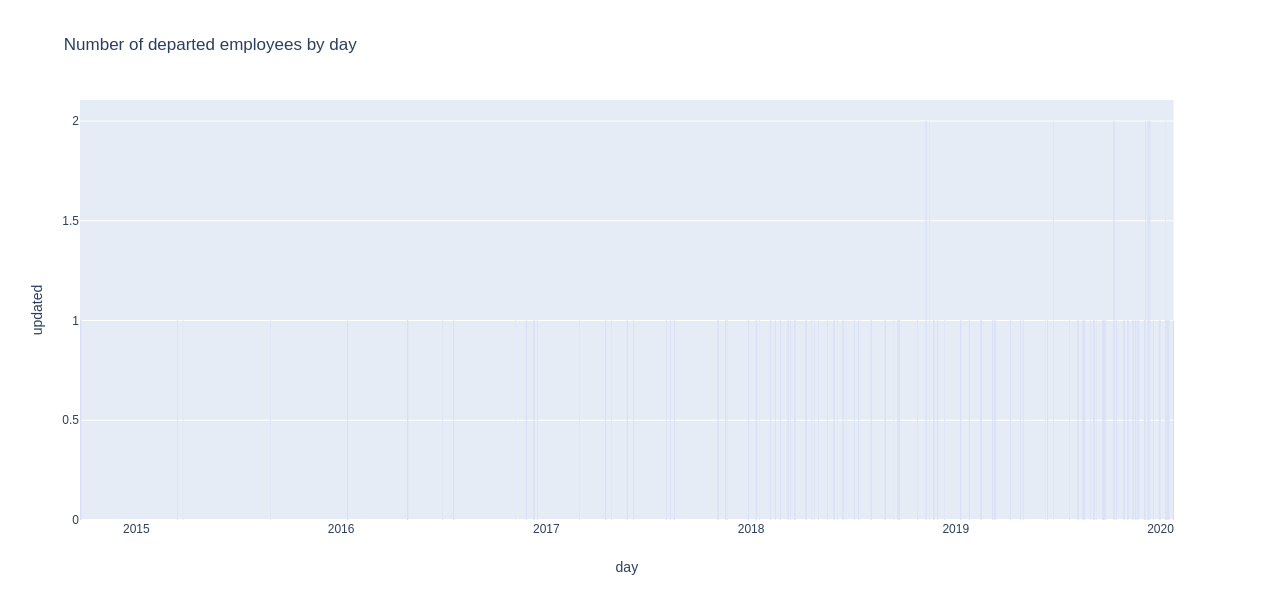

In [30]:
import plotly.express as px

title = "Number of departed employees by day"
fig = px.bar(departues_by_day, x="day", y="updated", title=title)
fig.show()

In [31]:
departues_by_month = df.groupby(["month"]).count().reset_index()

In [32]:
print(departues_by_month)

        month  updated  day
0  2014-09-01        2    2
1  2015-03-01        2    2
2  2015-08-01        1    1
3  2016-01-01        1    1
4  2016-04-01        2    2
5  2016-06-01        1    1
6  2016-07-01        1    1
7  2016-11-01        2    2
8  2016-12-01        2    2
9  2017-03-01        1    1
10 2017-04-01        2    2
11 2017-05-01        1    1
12 2017-06-01        1    1
13 2017-08-01        3    3
14 2017-11-01        3    3
15 2017-12-01        1    1
16 2018-01-01        2    2
17 2018-02-01        3    3
18 2018-03-01        4    4
19 2018-04-01        3    3
20 2018-05-01        3    3
21 2018-06-01        3    3
22 2018-07-01        2    2
23 2018-08-01        2    2
24 2018-09-01        3    3
25 2018-10-01        1    1
26 2018-11-01        6    6
27 2018-12-01        1    1
28 2019-01-01        2    2
29 2019-02-01        1    1
30 2019-03-01        2    2
31 2019-04-01        2    2
32 2019-05-01        1    1
33 2019-06-01        4    4
34 2019-07-01       

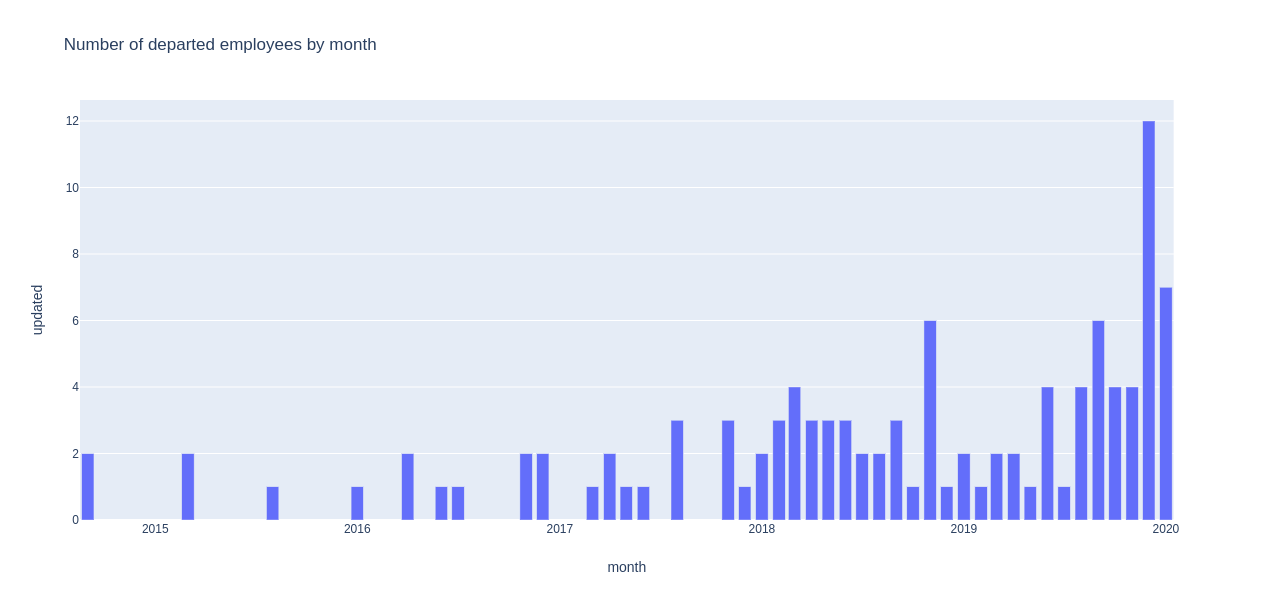

In [33]:
import plotly.express as px

title = "Number of departed employees by month"
fig = px.bar(departues_by_month, x="month", y="updated", title=title)
fig.show()

In [34]:
employee_departure_window = df

employee_departure_window = (
    employee_departure_window.groupby(["day"])
    .count()
    .reset_index()
    .rolling(window="30D", on="day")
    .sum()
)
employee_departure_window["count"] = employee_departure_window["updated"]

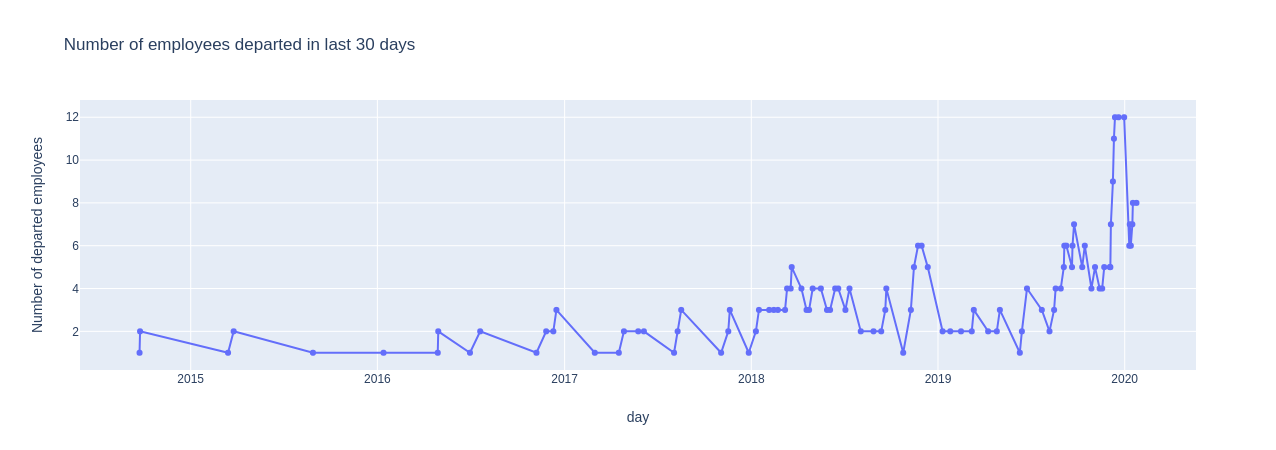

In [35]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=employee_departure_window["day"],
        y=employee_departure_window["count"],
        mode="lines+markers",
    )
)
fig.update_layout(
    title="Number of employees departed in last 30 days",
    xaxis_title="day",
    yaxis_title="Number of departed employees",
)